# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [106]:
import pandas as pd
data = pd.read_csv('wine.csv')
data.tail()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,2
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,2


In [107]:
# oversample it to increase its size
for i in range(1,5):
    data = pd.concat([data, data], ignore_index=True)

data.tail()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
2843,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740,2
2844,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750,2
2845,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835,2
2846,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840,2
2847,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560,2


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [108]:
from sklearn.model_selection import train_test_split

# Separate features and labels
features = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']
label = 'WineVariety'
X, y = data[features].values, data[label].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#### If you dont have torch installed run this 

In [109]:
# !pip install torchvision

In [110]:
import torch
import torch.nn as nn
import torch.utils.data as td

torch.manual_seed(0)

In [111]:
# Create a dataset and loader for the training data and labels
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()
train_ds = td.TensorDataset(train_x,train_y)
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')

Ready to load data


In [112]:
# Defining the neural network, I use 128 and 64 because I read is a common number for simple exercises
# https://stackoverflow.com/questions/58459721/why-there-are-128-nodes-in-second-layer-of-keras-neural-network-in-fashion-mnist#:~:text=In%20this%20tutorial%2C%20we%20are,for%20a%20simple%20neural%20network.

class WineClassifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(WineClassifier, self).__init__()
        self.layer1 = nn.Linear(input_dim, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

model = WineClassifier(input_dim=train_x.shape[1], output_dim=3) 
print(model)

WineClassifier(
  (layer1): Linear(in_features=13, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=3, bias=True)
)


In [113]:
import torch.optim as optim

def train(model, data_loader, optimizer):
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

loss_criteria = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 2.164244
Validation set: Average loss: 0.794864, Accuracy: 573/855 (67%)

Epoch: 2
Training set: Average loss: 0.715643
Validation set: Average loss: 0.869149, Accuracy: 595/855 (70%)

Epoch: 3
Training set: Average loss: 0.637186
Validation set: Average loss: 0.829459, Accuracy: 541/855 (63%)

Epoch: 4
Training set: Average loss: 0.556249
Validation set: Average loss: 0.774145, Accuracy: 563/855 (66%)

Epoch: 5
Training set: Average loss: 0.487748
Validation set: Average loss: 0.729984, Accuracy: 578/855 (68%)

Epoch: 6
Training set: Average loss: 0.437775
Validation set: Average loss: 0.711180, Accuracy: 613/855 (72%)

Epoch: 7
Training set: Average loss: 0.393297
Validation set: Average loss: 0.702498, Accuracy: 603/855 (71%)

Epoch: 8
Training set: Average loss: 0.350031
Validation set: Average loss: 0.619441, Accuracy: 616/855 (72%)

Epoch: 9
Training set: Average loss: 0.320501
Validation set: Average loss: 0.515452, Accuracy: 669/855 (78%)

E

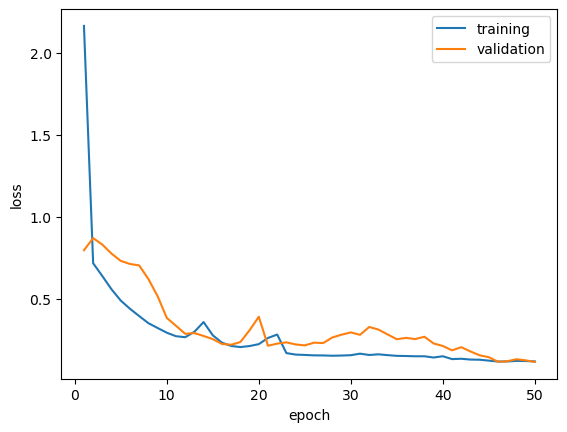

In [114]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [115]:
import numpy as np
classes = ['Variety A','Variety B','Variety C']
model.eval()

# Get predictions for two new wine samples
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
# Get the predicted classes.
for to_predict in x_new:
    x = torch.Tensor(to_predict).float()
    x =x.unsqueeze(0)
    _, predicted = torch.max(model(x).data, 1)
    print('Prediction:',classes[predicted.item()])

Prediction: Variety A
Prediction: Variety B
